# Выявление закономерностей определяющих успешность игры 

### Введение

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо по данным до 2016 года выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных  
- Name — название игры  
- Platform — платформа  
- Year_of_Release — год выпуска  
- Genre — жанр игры  
- NA_sales — продажи в Северной Америке (миллионы проданных копий)  
- EU_sales — продажи в Европе (миллионы проданных копий)  
- JP_sales — продажи в Японии (миллионы проданных копий)  
- Other_sales — продажи в других странах (миллионы проданных копий)  
- Critic_Score — оценка критиков (максимум 100)  
- User_Score — оценка пользователей (максимум 10)  
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
- Данные за 2016 год могут быть неполными.  


# Задачи проекта

**1. Откройте файл с данными и изучите общую информацию**  

Путь к файлу: /datasets/games.csv. 

**2. Подготовьте данные**  

Замените названия столбцов (приведите к нижнему регистру);  
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;  
Обработайте пропуски при необходимости:  
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
- Опишите причины, которые могли привести к пропускам;  
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;  

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.  

**3. Проведите исследовательский анализ данных**  

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
- Возьмите данные за соответствующий **актуальный период**. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.  
- Не учитывайте в работе данные за **предыдущие годы**.  
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.  
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.  
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.  
- Соотнесите выводы с продажами игр на других платформах.  
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?  

**4. Составьте портрет пользователя каждого региона**  

Определите для пользователя каждого региона (NA, EU, JP):  
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
- Самые популярные жанры (топ-5). Поясните разницу.  
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?  

**5. Проверьте гипотезы**  

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  

Задайте самостоятельно пороговое значение alpha.  

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.  

**6. Напишите общий вывод**

### Открытие файла с данными и изучение общей информации

Импортируем необходимые для анализа библиотеки и откроем имеющиеся файлы с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import seaborn as sns

games = pd.read_csv('/datasets/games.csv')

Изучим информацию в таблице games.

In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Изучим пропуски в столбце "Name".

In [4]:
display(games[games['Name'].isna()])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Изучим пропуски в столбце "Year_of_Release" и выведем число строк с пропуками.

In [5]:
display(games[games['Year_of_Release'].isna()].head(20))
print(f'Всего {len(games[games["Year_of_Release"].isna()])} строк с пропусками в столбце "Year_of_Release"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Всего 269 строк с пропусками в столбце "Year_of_Release"


Выведем число строк с пропусками в столбцах "Critic_Score", "User_Score", "Rating". 

In [6]:
len(games[games['Critic_Score'].isna() | games['User_Score'].isna() | games['Rating'].isna()])


8690

#### Вывод

1) Для дальнейшего анализа, с целью обнаружения дубликатов с разным регистром, приведём данные в столбцах "Name", "Platform", "Genre" и "Rating" к нижнему регистру.  
2) Столбец "Year_of_Release" приведем к типу данных "Int64", так как год выпуска не может быть дробным числом.  
3) Столбец "User_Score" приведем к типу данных "float", так как оценка пользователей это дробные числовые данные.  
4) В столбцах "Name" и "Genre" имеются пропуски данных в одиннаковых строках, всего таких строк две и так как достоверно заполнить не представляется возможным в дальнейшем исключим эти строки.  
5) В столбцах "Year_of_Release", "Critic_Score", "User_Score" и "Rating" имеются пропуски данных. Достоверно заполнить их не представляется возможным, поэтому заполним пропуски значением "-1" для дальнейшей возможности не включать эти строки в срез данных.  

### Предобработка данных

Приведем к нижнему регистру данные в столбцах "Name", "Platform", "Genre" и "Rating" в соответствии с пунктом 1.1.

In [7]:
for columns in ['Name', 'Platform', 'Genre', 'Rating']:
    games[columns] = games[columns].str.lower()

Приведем к типу "Int64" данные в столбце "Year_of_Release" в соответствии с пунктом 1.1.

In [8]:
 games['Year_of_Release'] =  games['Year_of_Release'].astype('Int64')

Приведем названия столбцов таблицы нижнему регистру.

In [9]:
 games.columns =  games.columns.str.lower()

Для приведения к типу "float" данных в столбце "User_Score" в соответствии с пунктом 1.1. необходимо обработать в столбцах с рейтингом аббревиатуру 'tbd'. Исходя из доступной в сети информации эту аббревиатуру можно перевести как to be determined, то есть "подлежит определению".  
Изучим строки, в которых встречается этот тип данных и выведем их число.

In [10]:
display(games.query('critic_score == "tbd"'))
display(games.query('user_score == "tbd"').head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,e
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,e10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,t
645,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,e
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.0,0.07,73.0,tbd,e


Значение "tbd" встречается только в столбце "user_score", в столбце с рейтингом критиков "critic_score" пропущенные значения обозначены "NaN".

In [11]:
games_tbd = games.query('user_score == "tbd"')
print(
    f"Количество строк с данными tbd равно {len(games_tbd)} или {len(games_tbd)/len(games):.1%} от всех строк"
)

Количество строк с данными tbd равно 2424 или 14.5% от всех строк


Так как строк с данными "tbd" значимое число и достоверное их заполнение не представляется возможным, заменим значения "tbd" в столбце "user_score" на типовое обозначение отсутствия данных "NaN". Также приведем данные к типу 'float' в соответствии с пунктом 1.1.

In [12]:
games['user_score'] = games['user_score'].replace('tbd', np.nan).astype('float')

Удалим строки с пропусками в столбцах "name" и "genre" в соответствии с пунктом 1.1.

In [13]:
games.dropna(subset=['name'], inplace = True)

Обработаем пропуски в столбцах "year_of_release", "critic_score", "user_score" и "rating" заменив отсутствующие значения на "-1" в соответствии с пунктом 1.1.

In [14]:
games[['year_of_release', 'critic_score', 'user_score', 'rating']] = (
games[['year_of_release', 'critic_score', 'user_score', 'rating']].fillna(-1)
)

Проверим наличие дубликатов в датафрейме.

In [15]:
games.duplicated().sum()

0

Выведем типы данных таблицы games.

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Посчитаем суммарные продажи во всех регионах и запишим их в столбец "total_sales".

In [17]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [18]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38


#### Вывод

1) Значения 'tbd' в столбце "user_score" заменены на NaN.  
2) Изменен тип данных и регистр в соответствии с выводами пункта 1.  
3) Название столбцов приведено к нижнему регистру.  
4) Пропуски обработаны и заменены на значение "-1" в соответствии с выводами пункта 1.  
5) Добавлен столбец "total_sales" с суммарными продажами во всех регионах.

### Исследовательский анализ данных

#### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

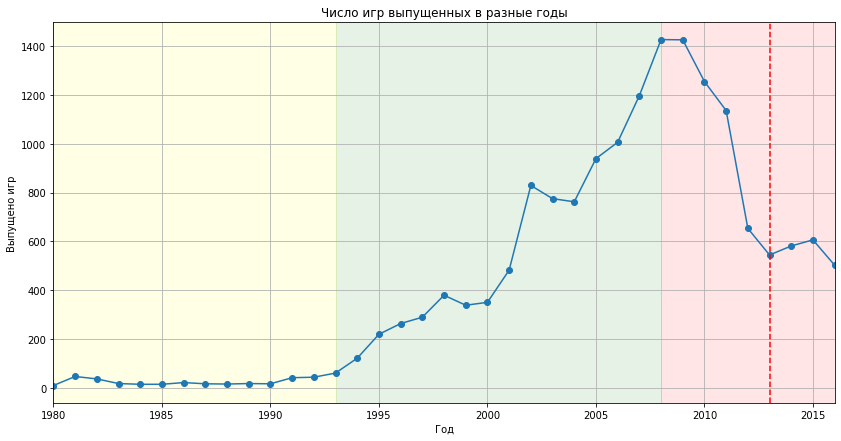

In [19]:
year_pivot = (games
             ).query('year_of_release != -1'
    ).pivot_table(index = ['year_of_release'], values = 'name', aggfunc = 'count'
    ).sort_values('year_of_release', ascending = False
    ).plot(style='o-', figsize = (14, 7), grid = True, legend=False)

plt.axvspan(1980,1993, alpha=0.1, color='yellow')
plt.axvspan(1993,2008, alpha=0.1, color='green')
plt.axvspan(2008,2016, alpha=0.1, color='red')
plt.axvline(2013, linestyle ='--', color ='red')
plt.title('Число игр выпущенных в разные годы')
plt.xlabel('Год')
plt.ylabel('Выпущено игр')
plt.show()

##### Вывод

Исходя из графика выпуска игр в год можно наблюдать три периода рынка компьютерных игр:  
- I период 1980-1993 годы. Стагнация и медленный рост выпуска игр.  
- II период 1993-2008 годы. Бурный рост производства и выпуска игр.  
- III период 2008-2016 года. Спад выпуска игр.  
Третий период можно разделить на два этапа: 1-й 2008-2013 годы этап быстрого падения выпуска игр, 2-й этап 2013-2016 годы этап стабилизации стабилизация рынка выпуска игр.   
Для дальнейшего анализа приоритетными будут данные III периода и его 2-го этапа для прогнозирования на 2017 год.


#### Посмотрим, как менялись продажи по платформам.  За какой характерный срок появляются новые и исчезают старые платформы?

Объявим датафрейм с суммарным продажами каждой платформы в разные годы III периода и построим график продаж по платформам.

In [20]:
sales_sum_by_year_platform = (games
                              .query('year_of_release != -1 & year_of_release >=2008')
                              .groupby(['year_of_release', 'platform'])['total_sales']
                              .sum()
                              .unstack()
                             )
sales_sum_by_year_platform.tail()

platform,3ds,dc,ds,pc,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xb,xone
year_of_release,,,,,,,,,,,,,,
2012,51.36,NaN,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN,NaN
2013,56.57,NaN,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,NaN,18.96
2014,43.76,NaN,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,NaN,54.07
2015,27.78,NaN,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,NaN,60.14
2016,15.14,NaN,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,NaN,26.15


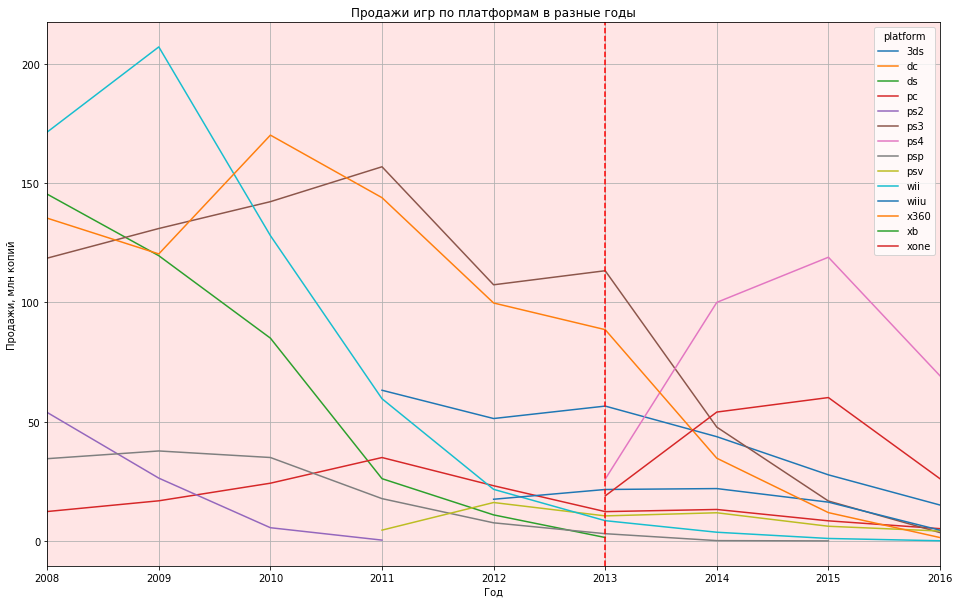

In [21]:
sales_sum_by_year_platform.plot(figsize = (16, 10), grid = True, legend=True)
plt.axvspan(1980,1993, alpha=0.1, color='yellow')
plt.axvspan(1993,2008, alpha=0.1, color='green')
plt.axvspan(2008,2016, alpha=0.1, color='red')
plt.axvline(2013, linestyle ='--', color ='red')
plt.title('Продажи игр по платформам в разные годы')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')
plt.show()

In [22]:
sales_sum_by_year_platform

platform,3ds,dc,ds,pc,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xb,xone
year_of_release,,,,,,,,,,,,,,
2008,NaN,0.04,145.31,12.42,53.90,118.52,NaN,34.55,NaN,171.32,NaN,135.26,0.18,NaN
2009,NaN,NaN,119.54,16.91,26.40,130.93,NaN,37.78,NaN,206.97,NaN,120.29,NaN,NaN
2010,NaN,NaN,85.02,24.28,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN,NaN
2011,63.20,NaN,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN,NaN
2012,51.36,NaN,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN,NaN
2013,56.57,NaN,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,NaN,18.96
2014,43.76,NaN,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,NaN,54.07
2015,27.78,NaN,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,NaN,60.14
2016,15.14,NaN,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,NaN,26.15


Выберем 10 платформ с наибольшими суммарными продажами за все периоды и построим график расределения прождаж по годам.

In [23]:
top_10_sales_platform = (games
                              .query('year_of_release != -1')
                              .pivot_table(index = ['platform'], values = 'total_sales', aggfunc='sum')
                              .sort_values(by = 'total_sales', ascending = False)
                              .reset_index()
                              .head(10)
                        )

display(top_10_sales_platform)
top_10_platform_list = list(top_10_sales_platform['platform'])
display(top_10_platform_list)

,platform,total_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', '3ds']

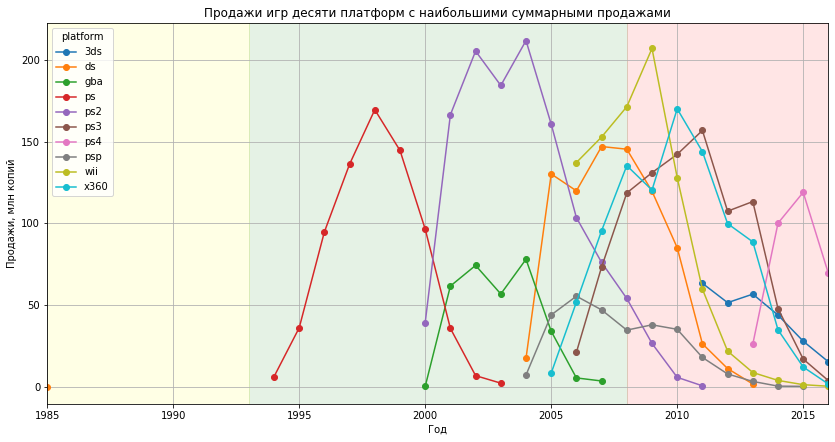

In [24]:
games_top_platform = (games
                      .query('platform in @top_10_platform_list & year_of_release !=-1')
                      .pivot_table(index=['year_of_release'], columns=['platform'], values = 'total_sales', aggfunc = 'sum') 
                     ) 

games_top_platform.plot(style='o-', figsize = (14, 7), grid = True, legend=True)
plt.axvspan(1980,1993, alpha=0.1, color='yellow')
plt.axvspan(1993,2008, alpha=0.1, color='green')
plt.axvspan(2008,2016, alpha=0.1, color='red')
plt.title('Продажи игр десяти платформ с наибольшими суммарными продажами')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')
plt.show()

Исследуем игры выпущенные в 1985 году на платформе ds для определения корректности аномалии на графике.

In [25]:
display(games.query('platform == "ds" & year_of_release == 1985'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,-1.0,-1.0,-1,0.02


Исходя из доступной в сети информации игра "strongest tokyo university shogi ds" действительно была выпущена в 1985 году на платформе ds. Но график выпуска игр на платформе ds начинается в 2004 году и прямой поисковый запрос "ds platform" выдает игровую консоль "Nintendo DS" выпущенную в 2004 году. Вороятнее всего речь идет про две разные консоли. В связи с этим учитывая отсутствие рейтингов, относительно небольшое число продаж (всего 20 тысяч экземпляров продававшихся только в Японии) исключим эту строку из дальнейшего анализа. 

In [26]:
games = games.drop([15957]).reset_index(drop=True)

Определим за какой срок появляются новые и исчезают старые платформы. Для этого найдем среднюю длительность выпуска игр каждой платформы из топ-10 по суммарным продажам игр.

In [27]:
games_top_platform_life = (
    games_top_platform
    .drop([1985])
    .unstack(level=1)
    .unstack(level=0)
         )
games_top_platform_life

platform,3ds,ds,gba,ps,ps2,ps3,ps4,psp,wii,x360
year_of_release,,,,,,,,,,
1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,74.16,6.67,205.38,NaN,NaN,NaN,NaN,NaN


In [28]:
life=[]
for column in games_top_platform_life.columns:
    t=len(games_top_platform_life[column].dropna())
    life.append(t)

life_platform = dict(zip(list(games_top_platform_life.columns), life))
print(f'Словарь продолжительности эксплуатации платформ: {life_platform}')
print(f'Средняя продолжительность эксплуатации платформ: {sum(life)/len(life)} лет')

Словарь продолжительности эксплуатации платформ: {'3ds': 6, 'ds': 10, 'gba': 8, 'ps': 10, 'ps2': 12, 'ps3': 11, 'ps4': 4, 'psp': 12, 'wii': 11, 'x360': 12}
Средняя продолжительность эксплуатации платформ: 9.6 лет


Выделим платформы актуальные на 2016 год. Актуальными примем платформы для которых выпускаются игры в 2016 году.

In [29]:
actual_platform_list = list(sales_sum_by_year_platform.loc[2016].dropna().reset_index().loc[:, 'platform'])
display(actual_platform_list)

['3ds', 'pc', 'ps3', 'ps4', 'psv', 'wii', 'wiiu', 'x360', 'xone']

In [30]:
lf=[]
for platform in life_platform:
    if platform in actual_platform_list:
        print(f'На платформе {platform} игры выпускались около {life_platform[platform]} лет и она еще актуальна.')
    else:
        print(f'На платформе {platform} игры выпускались около {life_platform[platform]} лет, но она устарела.')
        lf.append(life_platform[platform])                                           #добавил в новой редакции
print(f'В среднем платформы исчезают спустя примерно {sum(lf)/len(lf):.1f} года.')   #добавил в новой редакции

На платформе 3ds игры выпускались около 6 лет и она еще актуальна.
На платформе ds игры выпускались около 10 лет, но она устарела.
На платформе gba игры выпускались около 8 лет, но она устарела.
На платформе ps игры выпускались около 10 лет, но она устарела.
На платформе ps2 игры выпускались около 12 лет, но она устарела.
На платформе ps3 игры выпускались около 11 лет и она еще актуальна.
На платформе ps4 игры выпускались около 4 лет и она еще актуальна.
На платформе psp игры выпускались около 12 лет, но она устарела.
На платформе wii игры выпускались около 11 лет и она еще актуальна.
На платформе x360 игры выпускались около 12 лет и она еще актуальна.
В среднем платформы исчезают спустя примерно 10.4 года.


##### Вывод

Из топ-10 платформ по продажам за все периоды 5 платформ еще актуальны: '3ds', 'ps3', 'ps4', 'wii', 'x360'.  
При дальшейшем анализе будем использовать только данные по актуальным на 2016 год платформам: '3ds', 'pc', 'ps3', 'ps4', 'psv', 'wii', 'wiiu', 'x360', 'xone'.  
Средняя продолжительность эксплуатации платформ 9,6 лет.


#### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

Построим график продаж игр для актуальных на 2016 год платформ.

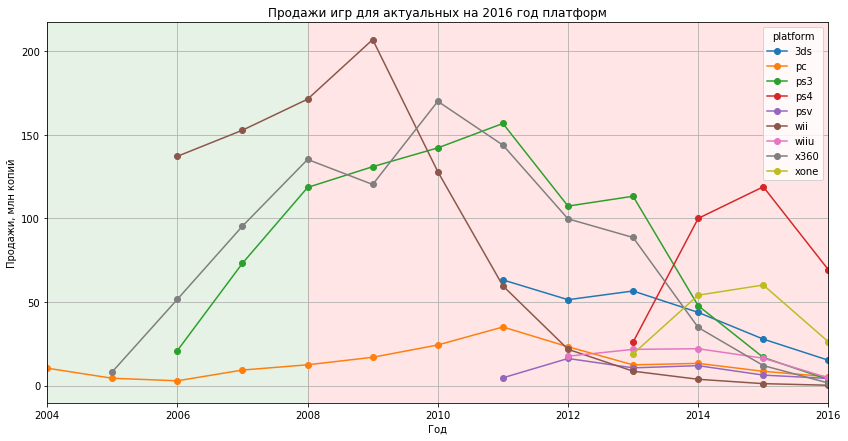

In [31]:
games_actual_platform = (games
                      .query('platform in @actual_platform_list & year_of_release !=-1')
                      .pivot_table(index=['year_of_release'], columns=['platform'], values = 'total_sales', aggfunc = 'sum') 
                     ) 

games_actual_platform.plot(style='o-', figsize = (14, 7), grid = True, legend=True)
plt.xlim(2004, 2016)
plt.axvspan(2004, 2008, alpha=0.1, color='green')
plt.axvspan(2008, 2016, alpha=0.1, color='red')
plt.title('Продажи игр для актуальных на 2016 год платформ')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')
plt.show()

Построим гистограмму продаж каждой платформы за актуальный период 2008-2016 годов.

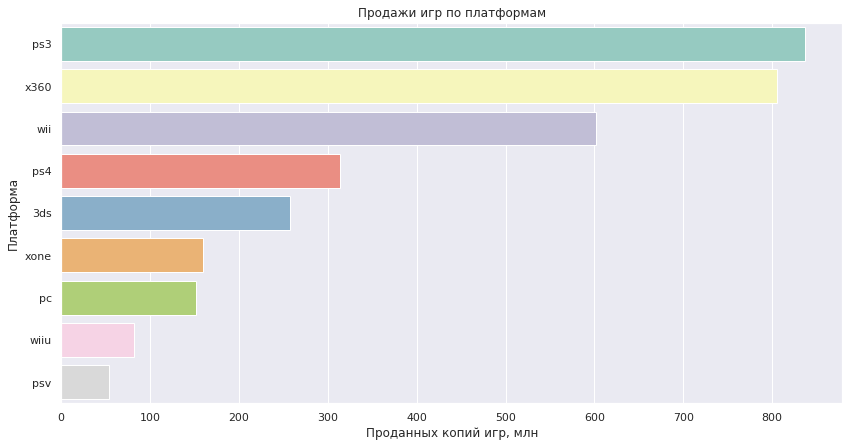

platform
ps3     837.19
x360    805.96
wii     601.26
ps4     314.14
3ds     257.81
xone    159.32
pc      151.29
wiiu     82.19
psv      53.81
Name: total_sales, dtype: float64

In [32]:
actual_platform_sales = games_actual_platform.query('year_of_release >= 2008').unstack(level=0).reset_index()
actual_platform_sales.columns = ['platform', 'year_of_release','total_sales']
actual_platform_sales = actual_platform_sales.groupby('platform')['total_sales'].sum().sort_values(ascending = False)

sns.set(rc={'figure.figsize':(14,7)})
sns.barplot(y = actual_platform_sales.index, x = actual_platform_sales.values, orient = 'h', palette = 'Set3')   
plt.title('Продажи игр по платформам')
plt.xlabel('Проданных копий игр, млн')
plt.ylabel('Платформа')
plt.show()
actual_platform_sales

##### Вывод

- По данным до 2016 года на рынке отсутствуют платформы с растущими продажами. Лидеры продаж PS3, X360 и Wii являются морально устаревшими. Первые продажи игр для них начались еще в 2005-2006 годах, период их расцвета пришёлся на 2009-2011 года. С учетом графика продаж и средней продолжительности эксплуатации платформ около 9,6 лет можно говорить о скором исчезновения этих платформ с рынка.  
- Наиболее перспективными платформами являются PS4, Xone и 3DS из-за относительной новизны этих платформ (начало продаж игр в 2011-2013 годах) и относительно высоких продаж за актуальный период. При старте продаж в 2013 году PS4 имеет число продаж (314 млн. копий) почти в два раза выше, чем у Xone (159 млн. копий). Платформа 3DS, кроме одного года, демонстрирует падение продаж с релиза, но несмотря на это выходит по продажам в топ-3 платформ актуальных на 2016 год.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

Оставим в датафрейме только данные с второго этапа III периода 2013-2016 год, так как эти данные являются наиболее актуальными для рассматриваемого периода и прогноза на 2017 год.

In [33]:
games = games.query('year_of_release >= 2013')

Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам за актуальный период 2013-2016 год.

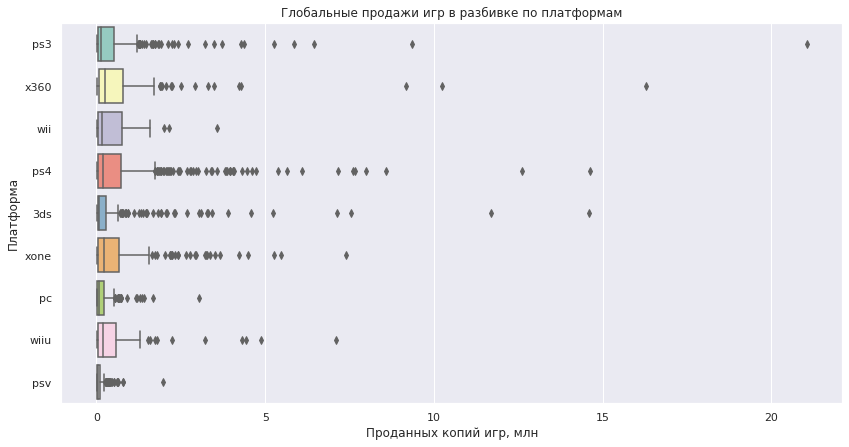

In [34]:
sns.boxplot(
    data = games, y = 'platform',\
    x = 'total_sales', orient = 'h', order = actual_platform_sales.index, palette = 'Set3')
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Проданных копий игр, млн')
plt.ylabel('Платформа')
plt.show()

На графике наблюдается большое число игр находящихся за "усами" графика. Это свидетельствует о наличии игр-бестселлеров, продажи которых многократно превышают средние продажи. Построим график без учета игр-бестселлеров (игр проданных более 1,8 млн. копий). 

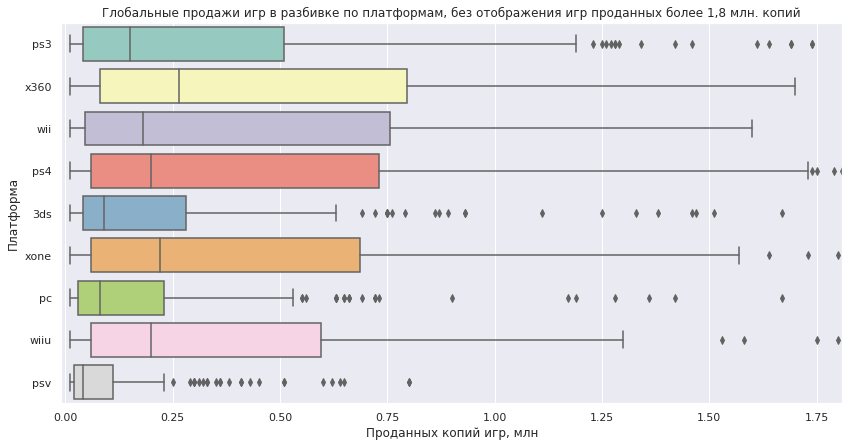

In [35]:
sns.boxplot(
    data = games, y = 'platform',\
    x = 'total_sales', orient = 'h', order = actual_platform_sales.index, palette = 'Set3').set_xlim([-0.01, 1.81]) 
plt.title('Глобальные продажи игр в разбивке по платформам, без отображения игр проданных более 1,8 млн. копий')
plt.xlabel('Проданных копий игр, млн')
plt.ylabel('Платформа')
plt.show()

##### Вывод

Для перспективных платформ PS4, Xone, 3DS максимальные продажи игр не превышают 15 млн. копий, в отличии от устаревающих платформ у которых некоторые игры продавались более 15-20 млн. копий. При этим среди перспективных платформ максимальные продажи игр существенно рознятся, так для PS4 14,63 млн копий, для 3DS 14,6 млн копий, а для Xone 7,39 млн копий.   
Исходя из графика продаж игр по платформам без отображения игр-бестселлеров можно сказать следующее:  
- Для прошлых лидеров рынка PS3, X360 и Wii медианные значения проданных игр находятся на уровне 150-265 тысяч копий;  
- Для актуальных лидеров рынка PS4, Xone, 3DS 90-220 тысяч копий.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Для перспективной на 2016 год платформы PS4 построим диаграммы рассеяния и посчитаем коэффициент линейной корреляции между продажами игр и оценкой критиков/оценкой пользователей.

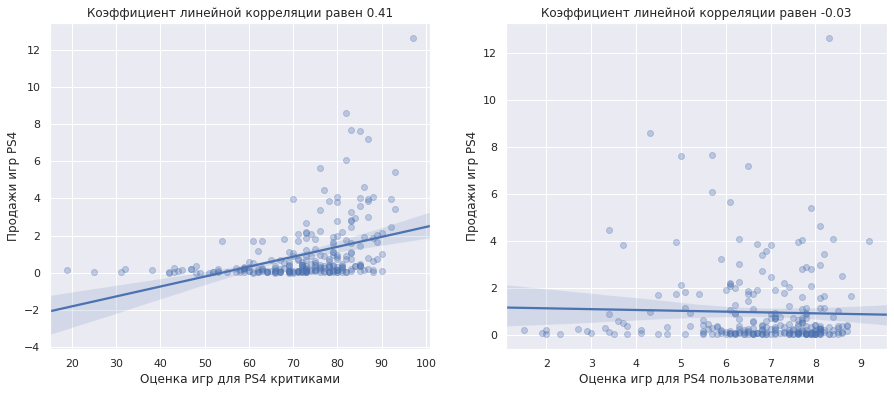

In [36]:
plt.figure(figsize = (15, 6))

df_critic_ps4 = games.query('platform == "ps4" & critic_score > 0.01')
plt.subplot(1, 2, 1)
sns.regplot(
    df_critic_ps4['critic_score'], df_critic_ps4['total_sales'], scatter_kws={'alpha':0.3} 
            )
corr1=df_critic_ps4[['critic_score']].corrwith(df_critic_ps4['total_sales']).values[0]
plt.title(f"Коэффициент линейной корреляции равен {df_critic_ps4['critic_score'].corr(df_critic_ps4['total_sales']):.2f}")
plt.xlabel('Оценка игр для PS4 критиками')
plt.ylabel('Продажи игр PS4')


df_user_ps4 = games.query('platform == "ps4" & user_score > 0.01')
plt.subplot(1, 2, 2)
sns.regplot(
    df_user_ps4['user_score'], df_user_ps4['total_sales'], scatter_kws={'alpha':0.3}
            )
corr2=df_user_ps4[['user_score']].corrwith(df_user_ps4['total_sales']).values[0]
plt.title(f"Коэффициент линейной корреляции равен {df_user_ps4['user_score'].corr(df_user_ps4['total_sales']):.2f}")
plt.xlabel('Оценка игр для PS4 пользователями')
plt.ylabel('Продажи игр PS4')

plt.show()

Для остальных платформ так же построим диаграммы рассеяния и посчитаем коэффициент линейной корреляции между продажами игр и оценкой критиков/оценкой пользователей.

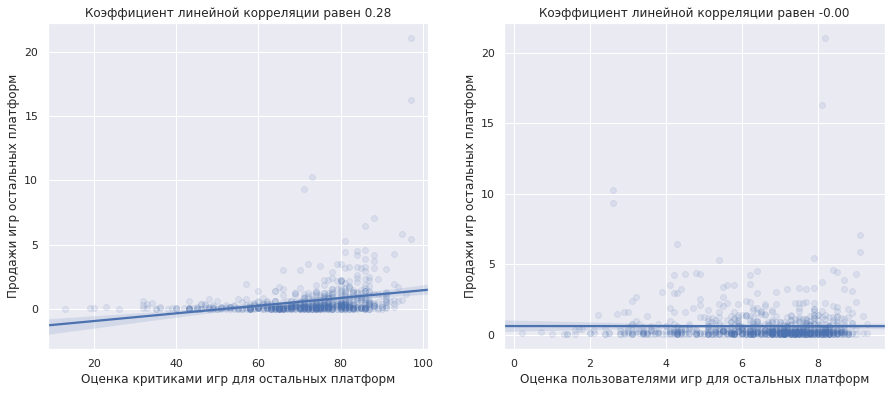

In [37]:
plt.figure(figsize = (15, 6))

df_critic_other = games.query('platform != "ps4" & critic_score > 0.01')
plt.subplot(1, 2, 1)
sns.regplot(
    df_critic_other['critic_score'], df_critic_other['total_sales'], scatter_kws={'alpha':0.1} 
            )
corr3=df_critic_other[['critic_score']].corrwith(df_critic_other['total_sales']).values[0]
plt.title(f"Коэффициент линейной корреляции равен {df_critic_other['critic_score'].corr(df_critic_other['total_sales']):.2f}")
plt.xlabel('Оценка критиками игр для остальных платформ')
plt.ylabel('Продажи игр остальных платформ')


df_user_other = games.query('platform != "ps4" & user_score > 0.01')
plt.subplot(1, 2, 2)
sns.regplot(
    df_user_other['user_score'], df_user_other['total_sales'], scatter_kws={'alpha':0.1}
            )
corr4=df_user_other[['user_score']].corrwith(df_user_other['total_sales']).values[0]
plt.title(f"Коэффициент линейной корреляции равен {df_user_other['user_score'].corr(df_user_other['total_sales']):.2f}")
plt.xlabel('Оценка пользователями игр для остальных платформ')
plt.ylabel('Продажи игр остальных платформ')

plt.show()

##### Вывод

- Для выбранной платформы PS4 наблюдается слабая положительная линейная корреляция (к=0,41) оценки критиков и продаж игр. Линейной корреляции между оценками пользователей и продажами не наблюдается (к=-0,03).  
- Для остальных платформ не наблюдается принципиальных отличий от платформы PS4. Коэффициент корреляции между продажами игр и оценкой критиков/оценкой пользователей составляет 0,28/-0,00 соответственно.

#### Посмотрим на общее распределение игр по жанрам. Выявим самые прибыльные жанры. Выделим жанры с высокими и низкими продажами.

Построим гистограммы распределения игр по жанрам, продажам и средним продажам.

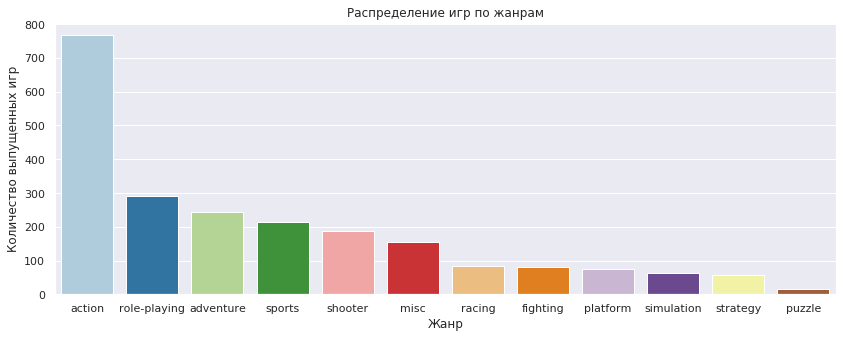

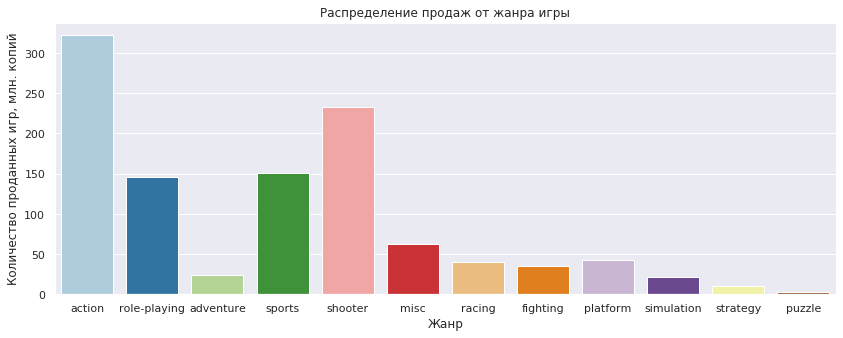

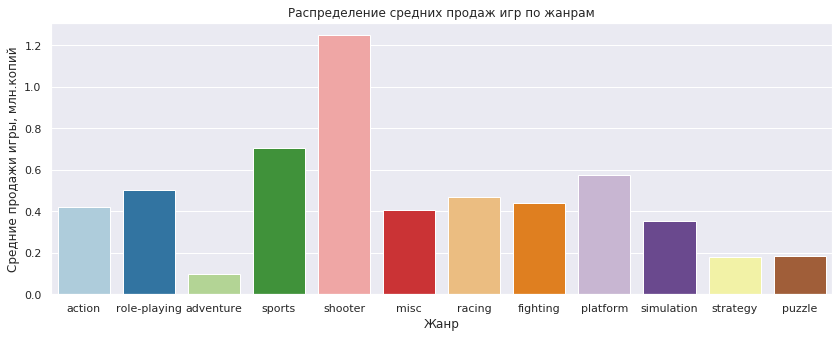

In [38]:
genres_games_pivot = (
                games
                .pivot_table(index=['genre'], values=['total_sales'], aggfunc=('count','sum', 'mean'))
                .sort_values(('total_sales', 'count'), ascending=False)
                .reset_index()
               )

sns.set(rc={'figure.figsize':(14,5)})
sns.barplot(x=genres_games_pivot['genre'], y=genres_games_pivot[('total_sales', 'count')], palette = 'Paired')   
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество выпущенных игр')
plt.show()

sns.barplot(x=genres_games_pivot['genre'], y=genres_games_pivot[('total_sales', 'sum')], palette = 'Paired')   
plt.title('Распределение продаж от жанра игры')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр, млн. копий')
plt.show()

sns.barplot(x=genres_games_pivot['genre'], y=genres_games_pivot[('total_sales', 'mean')], palette = 'Paired') 
plt.title('Распределение средних продаж игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средние продажи игры, млн.копий')
plt.show()
plt.show()

Выведем результаты в табличном виде.

In [39]:
genres_games_pivot

genre total_sales                  
                       count      mean     sum
0         action         766  0.420196  321.87
1   role-playing         292  0.499623  145.89
2      adventure         245  0.096490   23.64
3         sports         214  0.703972  150.65
4        shooter         187  1.245882  232.98
5           misc         155  0.405290   62.82
6         racing          85  0.469294   39.89
7       fighting          80  0.441375   35.31
8       platform          74  0.576081   42.63
9     simulation          62  0.350968   21.76
10      strategy          56  0.180000   10.08
11        puzzle          17  0.186471    3.17

##### Вывод

- Исходя из графика распределения игр по жанрам более чем с двойным отрывом лидируют "Action" игры. Их за период 2013-2016 годов выпущено 766.  
- Самым прибыльным жанром игр так же является "Action", их продано около 321 млн. копий. Ближайшие конкуренты  "Shoter" и "Sports" имеют продажи 232 и 150 млн. копий.  
- Исходя из количестра выпущенных и проданных игр каждого жанра можно сказать, что в среднем наиболее прибыльными являются игры в жанре "Shoter", у которого игры продаются средним тиражом более 1,2 млн. копий. Вторым по прибыльности является жанр "Sports" с продажами игр около 0,7 млн. копий, третьим "Platform" со средними продажами 0,57 млн. копий. Наименее прибыльными по усредненным данным можно назвать "Puzzle", "Strategy" и "Adventure" жанры. 

### Составим портрет пользователя каждого региона

Построим круговые диаграммы предпочтений пользователей каждого региона (NA, EU, JP):  
- Самые популярные платформы (топ-5);  
- Самые популярные жанры (топ-5);  
- Рейтинг ESRB.  

Учитывая, что больше половины (9949 из 16715) строк исходного датафрейма имели пропуски в столбце Rating заменим заполненные маркером (-1) значения на "no_rating" и учтем их при построении диаграмм.

In [40]:
games['rating'] = games['rating'].replace(-1, "no_rating")

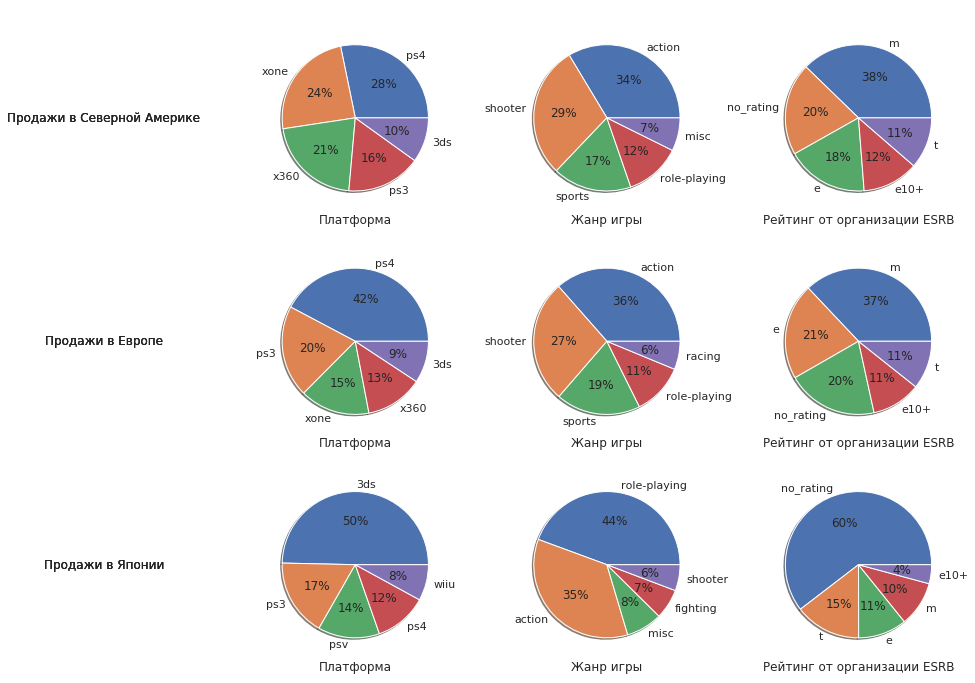

In [41]:
parametr_dict = {'platform' : 'Платформа', 'genre' : 'Жанр игры', 'rating': 'Рейтинг от организации ESRB'}
region_dict = {'na_sales' : 'Продажи в Северной Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales' : 'Продажи в Японии'}
num_columns = len(region_dict)+1
num_rows    = len(parametr_dict)
fig, ax = plt.subplots(num_rows,num_columns, figsize=(16,12))
for i,region in enumerate(region_dict.keys()):
    for j,parametr in enumerate(parametr_dict.keys()):
        df = (games
              .pivot_table(index=parametr, values=region, aggfunc='sum').sort_values(region, ascending=False).head()
             )
        #строим круговые диграммы
        fracs = np.array(df.values).ravel()
        ax[i,0].set_axis_off()                                  
        ax[i,0].text(0.5,0.5,region_dict[region],ha='center',va='center') 
        labels = np.array(df.index).ravel()
        ax[i,j+1].pie(fracs, labels=labels, autopct='%1.0f%%', shadow=True, startangle=0)
#        ax[i,j+1].axis('equal')
        ax[i,j+1].set(xlabel=parametr_dict[parametr])
        plt.tight_layout(pad=8.0, w_pad=0.1, h_pad=0.1)

#### Вывод

- Пользователи в Северной Америке чаще покупают игры: на платформе PS4, в жанре Action, с рейтингом M;  
- Пользователи в Европе чаще покупают игры:           на платформе PS4,  в жанре Action, с рейтингом M;  
- Пользователи в Японии чаще покупают игры:           на платформе 3DS,  в жанре Role-playing, без рейтинга от оргнизации ESRB.

В целом можно сказать что поведение пользователей в Северной Америке и Европе схоже. Топ предпочтений почти не отличается. Единственные отличия: в Северной Америке в топ-5 жанров входит Misc, а в Европе Racing. Так же в Европе более активно используют PS3 и PS4 (62% топ-5 платформ), а в Америке (44% топ-5 платформ)

Японские пользователи существенно отличаются от Североамериканских и Европейских. Наиболее пополярной платформой тут является 3DS, которая замыкает топ-5 Америки и Европы, кроме этого распространены платформы PSV и Wiiu, но в топ-5 не входят X360 и Xone. Так же в Японии в 4 раза более популярен жанр Role-playing (44% из топ-5 жаров), против 11-12% из топ-5 жанров в Америке и Европе, а игры жанра Shooter наоборот почти в 5 раз менее популярны (6% из топ-5 жанров Японии против 27-29% топ-5 жанров Европы и Америки). Так же стоит отметить интерес пользователей Японии к жанру Fighting и отсутствие инетереса к Sports жанру. 

Касательно рейтинга ESRB по регионам выделяется рынок Японии для которого характерно отсутствие этого рейтинга у 60% проданный игр.  
Везде топ-5 игр по рейтингу ESRB состоит из рейтингов E, T, M, E10+ и игр без рейтинга.

### Проверим гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Создадим выборки пользовательских рейтингов платформ и зададим параметр alpha (критический уровень статистической значимости) 0,05.

In [42]:
xbox_one_user_rating = games.query('user_score != (-1) & platform == "xone"')['user_score']
pc_user_rating = games.query('user_score != (-1) & platform == "pc"')['user_score']
alpha = 0.05

Сформируем **нулевую гипотезу**: средние пользовательские рейтинги платформ Xbox One и PC **не отличаются**.  
**Альтернативной гипотезой** будет: средние пользовательские рейтинги платформ Xbox One и PC **отличаются**.  
Проверим гипотезу о равенстве средних двух генеральных совокупнойстей для парных выборок. Дисперсии выборок будем считать не равными.

In [43]:
results = st.ttest_ind(xbox_one_user_rating, pc_user_rating, equal_var = False)

print('Средние пользовательские рейтинги платформы Xbox One', xbox_one_user_rating.mean())
print('Средние пользовательские рейтинги платформы PC', pc_user_rating.mean())
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средние пользовательские рейтинги платформы Xbox One 6.521428571428572
Средние пользовательские рейтинги платформы PC 6.2696774193548395
p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


##### Вывод
Гипотезу: **средние пользовательские рейтинги платформ Xbox One и PC одинаковые отвергнуть не удалось**.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Создадим выборки пользовательских рейтингов жанров. 

In [44]:
action_user_rating = games.query('user_score != (-1) & genre == "action"')['user_score']
sports_user_rating = games.query('user_score != (-1) & genre == "sports"')['user_score']

Сформируем **нулевую гипотезу**: средние пользовательские рейтинги жанров Action и Sports **не отличаются**.  
**Альтернативной гипотезой** будет: средние пользовательские рейтинги жанров Action и Sports **отличаются**.  
Проверим гипотезу о равенстве средних двух генеральных совокупнойстей для парных выборок. Дисперсии выборок будем считать не равными. Параметр alpha (критический уровень статистической значимости) 0,05.

In [45]:
results = st.ttest_ind(action_user_rating, sports_user_rating, equal_var = False)

print('Средние пользовательские рейтинги жанра Action', action_user_rating.mean())
print('Средние пользовательские рейтинги жанра Sports', sports_user_rating.mean())
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средние пользовательские рейтинги жанра Action 6.837532133676092
Средние пользовательские рейтинги жанра Sports 5.238124999999999
p-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу


##### Вывод
Так как нулевая гипотеза была отвергнута, следовательно можно сделать вывод с вероятностью 95%, что **средние пользовательские рейтинги жанров Action и Sports разные**. 

### Выводы

1) В ходе предобработки данных значения в стоблцах приведены к нужным типам и регистру. При обработке пропусков заполненение производилось на маркирующее значение -1, кроме случаев заполнения значения 'tbd' в столбце "user_score", где была замена на значение NaN. Две строки с отсутствием данных в столбцах "Name" и "Genre" были исключены. Добавлен столбец "total_sales" с суммарными продажами во всех регионах.  

2) Исходя из графика выпуска игр в год выделяются три периода рынка компьютерных игр:
- I период 1980-1993 годы. Стагнация и медленный рост выпуска игр;
- II период 1993-2008 годы. Бурный рост производства и выпуска игр;
- III период 2008-2016 года. Спад выпуска игр.  
Третий период можно разделить на два этапа: 1-й 2008-2013 годы этап быстрого падения выпуска игр, 2-й этап 2013-2016 годы этап стабилизации стабилизация рынка выпуска игр.
Для дальнейшего анализа приоритетными будут данные 2-го этапа III периода.

3) Из топ-10 платформ по продажам за все периоды 5 платформ еще актуальны: '3ds', 'ps3', 'ps4', 'wii', 'x360'.  
Средняя продолжительность эксплуатации платформ 9,6 лет.  
При дальшейшем анализе будем использовать только данные по актуальным на 2016 год платформам: '3ds', 'pc', 'ps3', 'ps4', 'psv', 'wii', 'wiiu', 'x360', 'xone'.

4) По данным до 2016 года на рынке отсутствуют платформы с растущими продажами. Лидеры продаж PS3, X360 и Wii являются морально устаревшими, можно говорить о скором исчезновения этих платформ с рынка.  
Наиболее перспективными платформами являются PS4, Xone, 3DS. Продажи игр для PS4 (314 млн. копий) почти в два раза выше, чем у Xone (159 млн. копий). Платформа 3DS, кроме одного года, демонстрирует падение продаж с релиза, но несмотря на это выходит по продажам в топ-3 платформ актуальных на 2016 год.  

5) Для перспективных платформ PS4, Xone, 3DS максимальные продажи игр не превышают 15 млн. копий, в отличии от устаревающих платформ у которых некоторые игры продавались 15-20 млн. копий. При этим среди перспективных платформ максимальные продажи игр существенно рознятся, так для PS4 14,63 млн копий, для 3DS 14,6 млн копий, а для Xone 7,39 млн копий.  
- Для прошлых лидеров рынка PS3, X360 и Wii медианные значения проданных игр находятся на уровне 150-265 тысяч копий;  
- Для актуальных лидеров рынка PS4, Xone, 3DS 90-220 тысяч копий.  

6) Для выбранной платформы PS4 наблюдается слабая положительная линейная корреляция (к=0,41) оценки критиков и продаж игр.  
Линейной корреляции между оценками пользователей и продажами не наблюдается (к=-0,03).  
Для остальных платформ не наблюдается принципиальных отличий от платформы PS4. Коэффициент корреляции между продажами игр и оценкой критиков/оценкой пользователей составляет 0,28/-0,00 соответственно.  

7) Исходя из анализа игр по жанрам можно сказать: 
- Наиболее популярным жанром является "Action". За период 2013-2016 годов выпущено 766 "Action" игр.  
- Самым прибыльным жанром игр так же является "Action", их продано около 321 млн. копий. Ближайшие конкуренты "Shoter" и "Sports" имеют продажи 232 и 150 млн. копий.  
- В среднем наиболее прибыльными являются игры в жанре "Shoter", у которого игры продаются средним тиражом более 1,2 млн. копий. Вторым и третьи по прибыльности являются соответственно жанры "Sports" и "Platform" со средними продажами игр около 0,7 и 0,57 млн. копий.  
- Наименее прибыльными по усредненным данным можно назвать "Puzzle", "Strategy" и "Adventure" жанры. 

8) Портреты пользователей в регионах:  
- Пользователи в Северной Америке чаще покупают игры: на платформе PS4, в жанре Action, с рейтингом М;
- Пользователи в Европе чаще покупают игры: на платформе PS3, в жанре Action, с рейтингом M;
- Пользователи в Японии чаще покупают игры: на платформе 3DS, в жанре Role-playing, без рейтинга от оргнизации ESRB.  
- В целом можно сказать что поведение пользователей в Северной Америке и Европе схоже. Топ предпочтений почти не отличается. Единственные отличия: в Северной Америке в топ-5 жанров входит Misc, а в Европе Racing. Так же в Европе более активно используют PS3 и PS4 (62% топ-5 платформ), чем в Америке (44% топ-5 платформ).  
- Японские пользователи существенно отличаются от Североамериканских и Европейских. Наиболее пополярной платформой тут является 3DS, которая замыкает топ-5 Америки и Европы, кроме этого распространены платформы PSV и Wiiu, но в топ-5 не входят X360 и Xone. Так же в Японии в 4 раза более популярен жанр Role-playing (44% из топ-5 жаров), против 11-12% из топ-5 жанров в Америке и Европе, а игры жанра Shooter наоборот почти в 5 раз менее популярны (6% из топ-5 жанров Японии против 27-29% топ-5 жанров Европы и Америки). Так же стоит отметить интерес пользователей Японии к жанру Fighting и отсутствие интереса к Sports жанру.
- Касательно рейтинга ESRB по регионам выделяется рынок Японии для которого характерно отсутствие этого рейтинга у 60% проданный игр. Везде топ-4 игр по рейтингу ESRB состоит из рейтингов E, T, M, E10+ и игр без рейтинга.  

9) По результатам проверки гипотез:  
- С критическим уровнем статистической значимости 5% не удалось отвергнуть гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
- С вероятностью 95% средние пользовательские рейтинги жанров Action и Sports разные.